# Kendall Outlaw Module 5 Project - Files, Exceptions, and SQL
### Task 1 - Read and work through Chapter 9 - Files & Exceptions - understand the examples. 
### 2/10/2023

## Page 322 Section 9.3.1 Writing to a Text File: Introducing the with Statement

In [6]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400  Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

## Page 323 Section 9.3.2 Reading Data from a Text File

In [7]:
with open('accounts.txt', mode='r') as f:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in f:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe              345
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


## Page 325 Section 9.4 Updating Text Files

In [8]:
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')
with accounts, temp_file:
    for record in accounts: 
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

## Page 327 Section 9.5 Serialization with JSON

In [9]:
import json
grades_dict = {'gradebook':
              [{'student_id': 1, 'name': 'Red', 'grade': "A"},
              {'student_id': 2, 'name': 'Green', 'grade': "B"},
              {'student_id': 3, 'name': 'White', 'grade': "A"}]}

with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)
    
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


## Page 330 Section 9.6 Focus on Security: pickle Serialization and Deserialization

## Page 330 and 331 Section 9.7 Additional Notes Regarding Files

## Page 331 and 332 Section 9.8 Handling Exceptions

In [26]:
def try_it(value):
    try:
        x=int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer.')
    else:
        print(f'int({value}) is {x}')
              
try_it(10.7)

int(10.7) is 10


## Page 332 Section 9.8.1 Division by Zero and Invalid Input

In [32]:
10 / 0

ZeroDivisionError: division by zero

## Page 332 and 333 Section 9.8.2 try Statements

In [27]:
def try_it(value):
    try:
        x=int(value)
    except ValueError:
        print(f'{value} count not be converted to integer')
    else:
        print(f'int({value}) is {value}')
    finally:
        print('finally executed')

In [28]:
try_it(10.7)

int(10.7) is 10.7
finally executed


In [29]:
try_it("Python")

Python count not be converted to integer
finally executed


## Page 335 Section 9.8.3 Catching Multiple Exceptions in One except Clause

## Page 336 Section 9.8.4 What Exceptions Does a Function or Method Raise?

## Page 336 Section 9.8.5 What Code Should Be Placed in a try Suite?

## Page 336 Section 9.9 finally Clause

In [30]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [31]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


## Page 339 Section 9.10 Explicitly Raising an Exception

## Page 339 and 340 Section 9.11 (Optional) Stack Unwinding and Tracebacks

In [35]:
def function1():
    function2()
    
def function2():
    raise Exception('An exception occurred')

## Page 342 Section 9.12 Intro to Data Science: Working with CSV Files

## Page 342 Section 9.12.1 Python Standard Library Module csv

In [23]:
import csv
with open('accounts.csv', mode = 'w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])

In [24]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


## Page 344 and 345 Section 9.12.2 Reading CSV Files into Pandas DataFrames

In [25]:
import pandas as pd

df = pd.read_csv('accounts.csv', names=['account', 'name', 'balance'])
df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


## Page 346 Section 9.12.3 Reading the Titanic Disaster Dataset

In [10]:
import pandas as pd
titanic = pd.read_csv('https://vincentarelbundock.github.io/' + 'Rdatasets/csv/carData/TitanicSurvival.csv')

In [18]:
pd.set_option('precision', 2)

In [11]:
titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [13]:
titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [15]:
titanic.columns = pd.columns = ['name', 'survived', 'sex', 'age', 'class']

In [16]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


## Page 347 Section 9.12.4 Simple Data Analysis with the Titanic Disaster Dataset

In [19]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [20]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

## Page 348 Section 9.12.5 Passenger Age Histogram

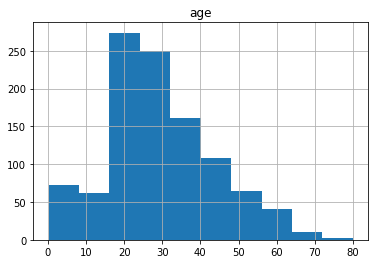

In [21]:
histogram = titanic.hist()